In [19]:
import numpy as np
import pandas as pd
#%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Data dimensionality, distance-based classifiers
Excercise with mnist digit dataset. Lets first load the data and take a peek:

In [45]:
X_train = pd.read_csv('./data/train_in.csv',header=None)
Y_train = pd.read_csv('./data/train_out.csv',header=None)
df_train = X_train.copy()
df_train['label']=Y_train

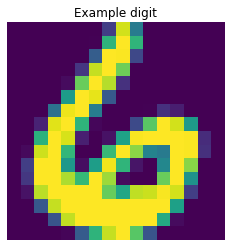

Figure 1: Exapmle of one element in the dataset


In [21]:
def show_number(nr,data):    
    X=np.array(data)
    X=np.reshape(X[nr,:],(16,16))
    imgplot = plt.imshow(X)
    plt.axis('off')
    
    plt.title('Example digit')
    plt.show()
show_number(0,X_train)
print('Figure 1: Exapmle of one element in the dataset')

How big is the difference between numbers?

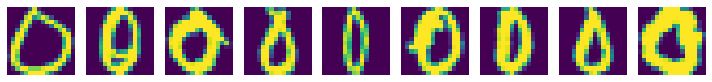

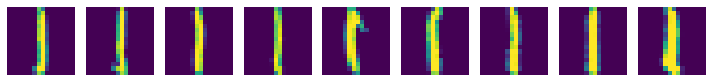

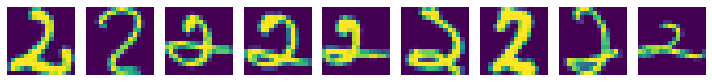

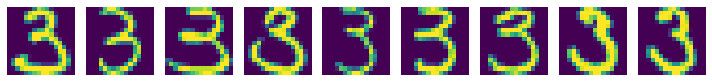

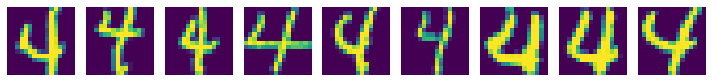

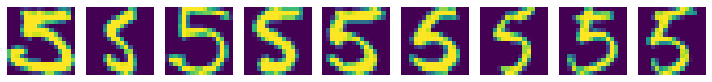

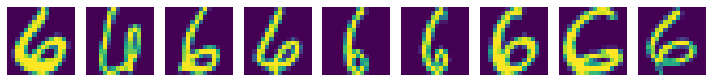

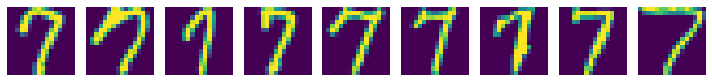

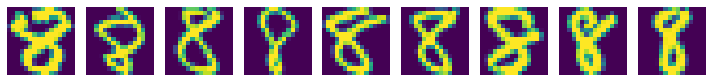

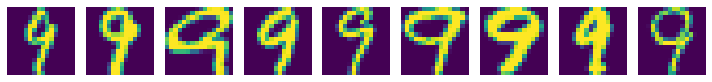

Figure 2: first 9 appearances of each digit


In [22]:
def get_image(nr,data):
    if 'label' in data.columns:
        data=np.array(data.drop('label',axis=1))
    else:
        data=data.values
    return np.reshape(data[nr,:],(16,16))

def display_multiple_img(images, rows = 3, cols=3):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(10,10))
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title])
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()

def display_digits(digit,data,rows,cols):
    total_images = rows*cols
    index=data.loc[data.label==digit].index[:total_images]
    images = {'Image'+str(i):get_image(i,data) for i in index}
    display_multiple_img(images, rows, cols)

    
for i in range(10):
    display_digits(i,df_train,rows=1,cols=9)
print('Figure 2: first 9 appearances of each digit')

For each digit d in range(10) calculate the 'centre': $c_{d}$ as the mean of allcoordinates of vectors constructin $C_{d}$.

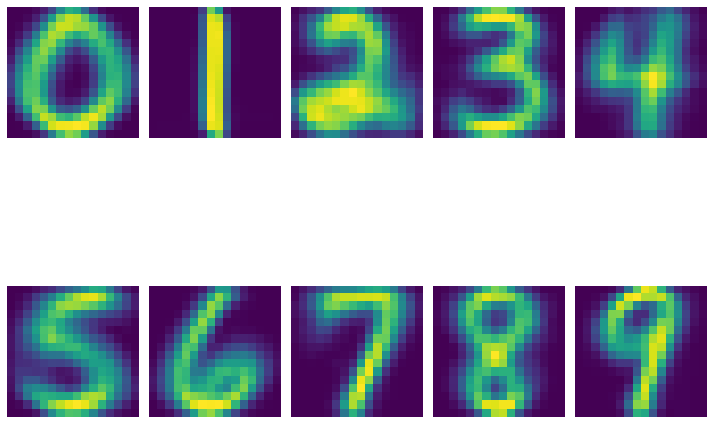

Figure 3: The average digits


In [23]:
c_ds=df_train.groupby('label').mean()

images = {'Image'+str(i):get_image(i,c_ds) for i in range(10)}
display_multiple_img(images, 2,5)
print('Figure 3: The average digits')

Next, calculate the distances between the centers of the 10 clouds, $dist_{ij} = dist(c_{i}; c_{j} )$, for
$i,j = 0,1,...9$.

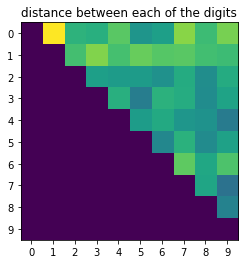

Figure 4: Distances of averages


In [24]:
from itertools import product
dist_ij=np.zeros((10,10))
for i,j in product(range(10),range(10)):
    if j>=i:
        dist_ij[i,j]=np.linalg.norm(c_ds.iloc[i].values-c_ds.iloc[j].values)
imgplot = plt.imshow(dist_ij)
plt.title(label='distance between each of the digits')
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()
print('Figure 4: Distances of averages')

#### Question
Given all these distances, try to say something about the expected accuracy of your
classifier. What pairs of digits seem to be most difficult to separate?
#### Answer
Looking at the graph i would suspect its hard to distinguish between 4 and 9, 7 and 9, 8 and 9, 3 and 5.  

In [25]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from matplotlib import cm

In [26]:
#Dimension reduction
pca = PCA(n_components=2)
lle = LocallyLinearEmbedding(n_components=2)
tsne = TSNE(n_components=2)

methods={'pca':pca,'lle':lle,'tsne':tsne}
dfs=dict()
for key in methods:
    X=methods[key].fit_transform(X_train)
    df=pd.DataFrame(X)
    df['label']=Y_train
    dfs[key]=df

In [27]:
def scatter_plot(c_ds,title):
    plt.scatter(c_ds.values[:,0],c_ds.values[:,1],c=Y_train)
    plt.title(title)

In [28]:
def scatter_plot(c_ds,title):
    fig, ax = plt.subplots()
    colors={0:'tab:red',1:'tab:blue',2:'tab:orange',3:'tab:green',4:'tab:purple',5:'tab:brown',6:'tab:pink',7:'tab:gray',8:'tab:olive',9:'tab:cyan'}
    for key in colors:
        x=c_ds.loc[c_ds.label==key].values[:,0]
        y=c_ds.loc[c_ds.label==key].values[:,1]
        ax.scatter(x,y, c=colors[key], label=key,
                   alpha=0.3, edgecolors='none')
    
    
    #average=c_ds.groupby('label').mean()
    #ax.scatter(average.values[:,0],average.values[:,1])
    #for i in range(10):
    #    label = f"{c_ds.index[i]}"
    #    plt.annotate(label, # this is the text
    #         (average.values[i,0],average.values[i,1]), # this is the point to label
    #         textcoords="offset points", # how to position the text
    #         xytext=(0,10), # distance from text to points (x,y)
    #         ha='center') # horizontal alignment can be left, right or   
    ax.legend()
    plt.title(title)
    plt.show()

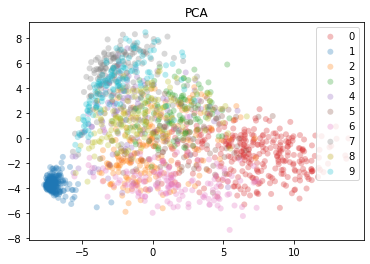

In [29]:
scatter_plot(dfs['pca'],'PCA')

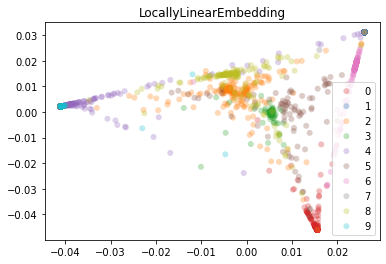

In [30]:
scatter_plot(dfs['lle'],'LocallyLinearEmbedding')

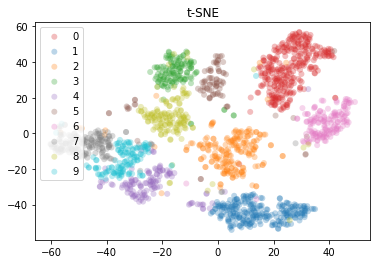

In [31]:
scatter_plot(dfs['tsne'],'t-SNE')

In [32]:
class distance_based_classifier:
    
    def __init__():
        self.df_predictions=pd.DataFrame()
        self.c_ds=None
        
    def fit(X,Y):
        df_train = X.copy()
        df_train['label']=Y
        self.c_ds=df_train.groupby('label').mean()
    
    def predict(X):
        for i in range(10):
            df=X-self.c_ds.iloc[i]
            self.df_predictions[i]=np.sqrt(np.multiply(df.abs(),df.abs()).sum(axis=1))
        df_inf

In [33]:
prediction=np.zeros(1707)
for i,x in enumerate(df_inf.min(axis=1)):
    prediction[i]=list(df_inf.iloc[i]).index(x)
prediction

NameError: name 'df_inf' is not defined

In [34]:
score_train=(len(Y_train)-np.sum(prediction-Y_train.values.T))/len(Y_train)
score_train

4.740480374926772

In [46]:
X_test = pd.read_csv('./data/test_in.csv',header=None)
Y_test = pd.read_csv('./data/test_out.csv',header=None)

In [36]:
df_inf=pd.DataFrame()
for i in range(10):
    df=X_test-c_ds.iloc[i]
    df_inf[i]=np.sqrt(np.multiply(df.abs(),df.abs()).sum(axis=1))
prediction=np.zeros(len(X_test))
for i,x in enumerate(df_inf.min(axis=1)):
    prediction[i]=list(df_inf.iloc[i]).index(x)

score_test=(len(Y_test)-np.sum(prediction-Y_test.values.T))/len(Y_test)
score_test

0.833

In [90]:
distances=[]
for i in range(9):
    distances.append(np.linalg.norm(X_train.iloc[0]-c_ds.iloc[i].values))
print(distances.index(min(distances)))


6


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, Y_train.values.ravel())

In [ ]:
Y_pred=neigh.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))


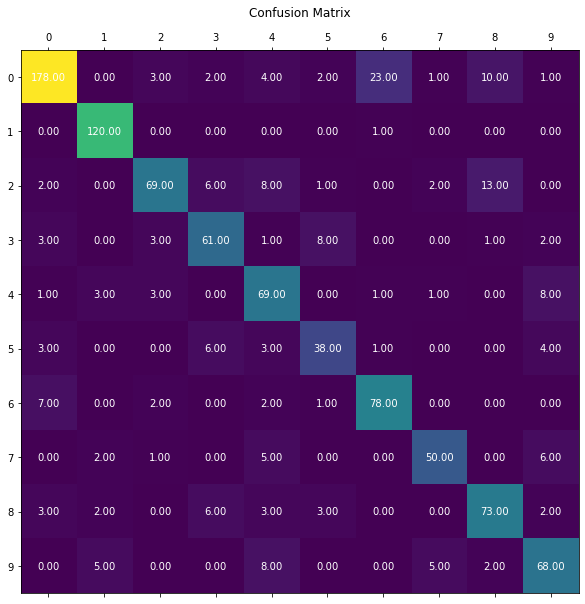

In [37]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
conf_matrix=confusion_matrix(Y_test,prediction)#confusion matrix distance based classifier
def plot_conf_matrix(conf_matrix):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.matshow(conf_matrix, aspect='auto')
    ax.set(title='Confusion Matrix', xticks=range(10), 
           yticks=range(10))
    for (i, j), val in np.ndenumerate(conf_matrix):
        ax.annotate('{:0.2f}'.format(val), (j,i), ha='center', va='center',color='white')
plot_conf_matrix(conf_matrix)

In [50]:
X_train = pd.read_csv('./data/train_in.csv',header=None)
Y_train = pd.read_csv('./data/train_out.csv',header=None)
X_test = pd.read_csv('./data/test_in.csv',header=None)
Y_test = pd.read_csv('./data/test_out.csv',header=None)
df_train = X_train.copy()
df_train['label']=Y_train

In [52]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,-1.0,-1.0,-1.0,-1.000,-1.000,-0.889,0.497,0.988,0.244,-0.861,...,0.401,0.752,1.000,0.609,0.206,-0.974,-1.000,-1.000,-1.000,-1.0
1703,-1.0,-1.0,-1.0,-1.000,-1.000,-0.961,-0.211,0.647,0.464,-0.071,...,-0.983,0.635,0.236,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
1704,-1.0,-1.0,-1.0,-1.000,-0.948,-0.307,-0.718,-0.178,0.543,1.000,...,-0.822,0.720,-0.716,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
1705,-1.0,-1.0,-1.0,-1.000,-1.000,-0.806,0.417,1.000,0.627,-0.559,...,0.491,0.866,-0.712,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [51]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.966,-0.237,0.847,0.393,-0.839,...,1.000,1.000,0.510,-0.165,-0.884,-1.000,-1.000,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-0.967,0.243,0.999,0.999,0.999,0.216,...,0.703,-0.000,-0.000,-0.587,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.866,0.841,1.000,0.993,...,-0.969,0.069,0.821,0.009,-0.898,-0.979,-1.000,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.000,-0.420,0.786,1.000,0.769,-0.085,...,0.957,0.598,0.333,0.332,-0.350,-1.000,-1.000,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.000,-0.391,0.959,1.000,0.466,-0.255,...,1.000,1.000,1.000,0.943,0.372,0.044,-0.850,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,0.410,1.000,0.574,...,-0.862,0.821,-0.021,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0
996,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.756,-0.351,0.163,0.457,...,-1.000,-0.700,0.511,1.000,0.812,-0.231,-0.968,-1.0,-1.0,-1.0
997,-1.0,-1.0,-1.0,-1.0,-1.000,-0.956,-0.129,0.763,1.000,0.497,...,0.851,1.000,0.568,0.365,-0.337,-1.000,-1.000,-1.0,-1.0,-1.0
998,-1.0,-1.0,-1.0,-1.0,-0.721,0.557,1.000,0.660,0.170,-0.604,...,0.199,0.745,-0.784,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0


T_train=X_train.copy()
T_test=X_test.copy()
T_train['bias']=1 #trainset
T_test['bias']=1 #testset
print(T_train.shape,T_test.shape)

In [169]:
W=np.random.random((257,10))
output=np.argmax(np.dot(T_train,W),axis=1)
prediction=np.argmax(np.dot(T_train,W),axis=1)

$\Delta W = \sum_{mis qualified} $ <br>
for misqualified point: Y_label,Y_prediction <br>
if elementwise(W[:,Y_label] < W[:,Y_precition]): <br>
    W[:,Y_precition] - T_train[?]<br>
    W[:,Y_label] + T_train[?]<br>


In [257]:
for i,(pred,label) in enumerate(zip(prediction,Y_train)):
    if pred != label:
        W[:,pred]-=T_train.iloc[i]*W[:,pred]>W[:,label]
        W[:,label]+=T_train.iloc[i]*W[:,pred]<W[:,label]

In [258]:
prediction=np.argmax(np.dot(T_train,W),axis=1)

In [259]:
sum(prediction.T==Y_train.values[:,0])

287

In [256]:
W

array([[10.51632416,  0.81410225,  0.44221868, ...,  0.12857211,
         0.44020883,  0.16262376],
       [10.42922573,  0.15090407,  0.29130538, ...,  0.92813716,
         0.36095624,  0.53134048],
       [10.73931576,  0.83208892,  0.17624099, ...,  0.6903732 ,
         0.10238611,  0.90971258],
       ...,
       [10.15252429,  0.63395292,  0.56189094, ...,  0.54820142,
         0.75947698,  0.88921719],
       [10.22471406,  0.07856275,  0.66064383, ...,  0.84260721,
         0.1438045 ,  0.58403008],
       [10.51259247,  0.32630227,  0.05066218, ...,  0.33190287,
         0.9280809 ,  0.57253607]])